# Income of Adults: Data Story Telling<a id='Income_of_Adults_Data_Story_Telling'></a>

## 1.0 Link the Python Site Packages Folder

In [1]:
import sys
source_directory = "/Users/pauljacob/Library/Python/3.8/lib/python/site-packages"
sys.path.append(source_directory)

## 2.0 Installs, Imports, and Initializations<a id='2.0_Imports_and_Initializations'></a>

### 2.1 Install Packages<a id='2.1_Install_Packages'></a>

In [2]:
%%capture
!pip3 install adjustText

### 2.2 Import Packages and Scripts<a id='2.2_Import_Packages_and_Scripts'></a>

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from adjustText import adjust_text


from IPython.core.display import display, HTML

from Income_of_Adults_Data_Story_Telling import p, rcr

/var/folders/77/y4hv4_s9751293nzv4yrfrtm0000gn/T/ipykernel_37859/1883984599.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### 2.3 Initialize the Notebook<a id='2.3_Initialize_Notebook'></a>

In [4]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_info_columns = 999

pd.set_option('display.max_colwidth', None)

display(HTML("<style>.container { width:90% !important; }</style>"))

## 3.0 Data Wrangling<a id='3.0_Data_Wrangling'></a>

### 3.1 Load the Data<a id='3.0_Load_The_Data'></a>

In [5]:
df_adult = rcr('adult.csv')
p(df_adult)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### 3.2 Clean the Data<a id='3.2_Clean_the_Data'></a>

In [6]:
#replace target column name 'income' values '<=50K' with '≤50K'.
df_adult.loc[:, 'income']=df_adult.loc[:, 'income'].replace({'<=50K':'≤50K'})
p(df_adult)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,≤50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,≤50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,≤50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,≤50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,≤50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,≤50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
df_adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,≤50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,≤50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,≤50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,≤50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,≤50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,≤50K


In [8]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<AxesSubplot:xlabel='age'>

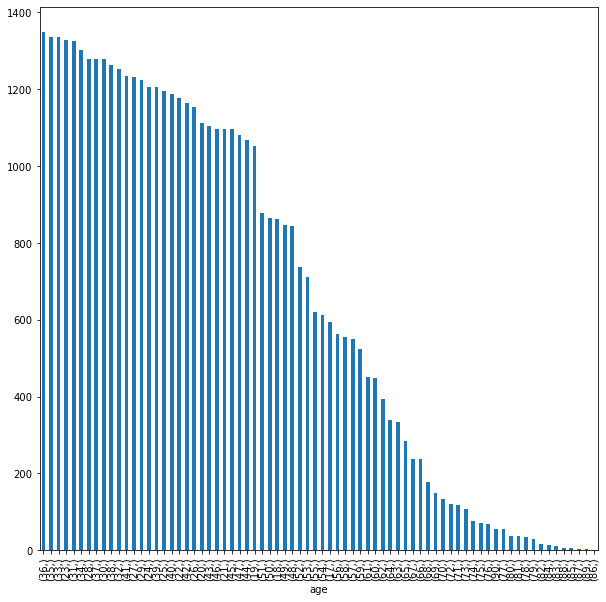

In [9]:
plt.figure(figsize=(10,10))
df_adult.loc[:, ['age']].value_counts().plot(kind='bar')

### 3.3 Show DataFrame Info<a id='3.1_Show_DataFrame_Info'></a>

In [10]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


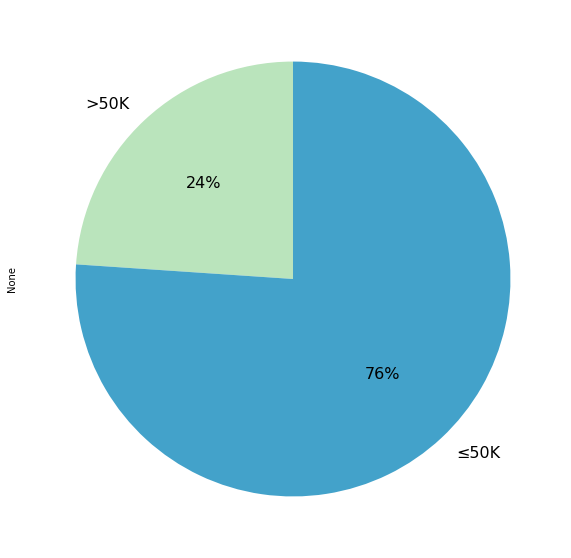

In [11]:
kind_string='pie'
y_string='income'
figure_filename='figure_'+y_string+'_'+kind_string+'_plot'+'.png'

color_list=['#bae4bc', '#43a2ca']
figure_size=(15,10)
startangle=90

df_adult.groupby(['income']).size().plot(kind=kind_string, y=y_string, figsize=figure_size, startangle=startangle, autopct='%1.0f%%', colors=color_list, textprops={'fontsize': 16})

plt.savefig(figure_filename, bbox_inches='tight', dpi=100)

<font color='blue'> Of the individuals sampled in this adult income census over 76% report ≤50K in annual income, while 24% report of 50K in annual income. There is a clear imbalance in annual income. Stated as a ratio this is about 3 to 1. For 3 individuals with less than of equal to 50K in annual income, there is one with over 50K in annual income. </font>

In [12]:
df_gender_income = df_adult.groupby(['gender', 'income']).size().unstack().reset_index()
df_gender_income.loc[:, 'total']=df_gender_income.loc[:, '≤50K']+df_gender_income.loc[:, '>50K']
df_gender_income.loc[:, '>50K_rate']=df_gender_income.loc[:, '>50K']/df_gender_income.loc[:, 'total']
df_gender_income = df_gender_income.sort_values('>50K_rate', ascending=False)
df_gender_income = df_gender_income.drop(columns=['total', '>50K_rate'])
df_gender_income

income,gender,>50K,≤50K
1,Male,9918,22732
0,Female,1769,14423


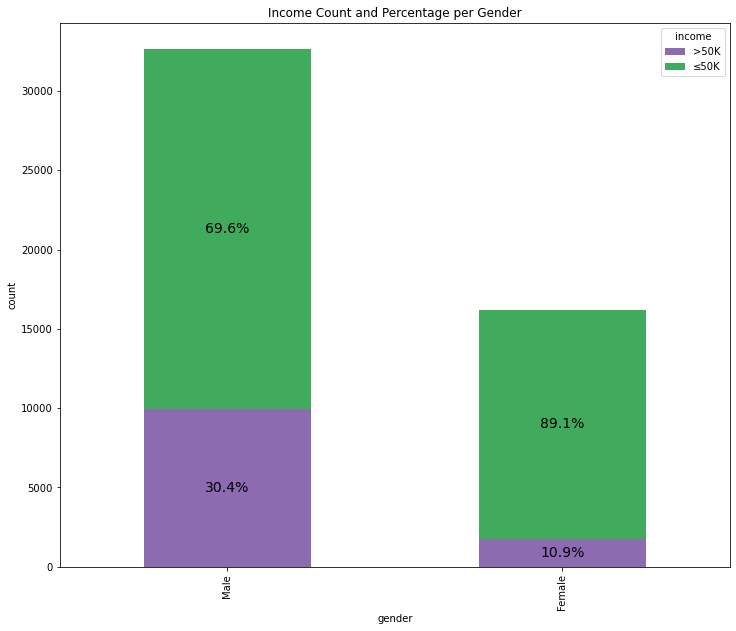

In [13]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

kind_string='bar'
x_string='gender'
title_string='Income Count and Percentage per Gender'
figure_filename='figure_'+x_string+'_'+kind_string+'_plot'+'.png'


df_gender_income.plot(x=x_string,
                      kind=kind_string,
                      stacked=True,
                      title=title_string,
                      mark_right=True,
                      color=['#8c6bb1', '#41ab5d'],
                      figsize=(12, 10))

df_total=df_gender_income["≤50K"] + df_gender_income[">50K"]
df_rel=df_gender_income[df_gender_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_gender_income.iloc[:, 1:].cumsum(1)[n],
                                         df_gender_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.savefig(figure_filename, bbox_inches='tight', dpi=100)
plt.show()


<font color='blue'> Of female individuals, just 11% report >50K in annual income. Of male individuals, 30% reported >50K in annual income. This can be can be interpretted as, if selecting a female at random and a male at random, the male is approximately three times more likely to report a >50K annual income. </font>

In [14]:
df_race_income = df_adult.groupby(['race', 'income']).size().unstack().reset_index()
df_race_income

income,race,>50K,≤50K
0,Amer-Indian-Eskimo,55,415
1,Asian-Pac-Islander,409,1110
2,Black,566,4119
3,Other,50,356
4,White,10607,31155


In [15]:
df_race_income.loc[:, 'total'] = df_race_income.loc[:, '≤50K'] + df_race_income.loc[:, '>50K']
df_race_income.loc[:, '>50K_rate'] = df_race_income.loc[:, '>50K'] / df_race_income.loc[:, 'total']
df_race_income = df_race_income.sort_values('>50K_rate', ascending=False)
df_race_income = df_race_income.drop(columns=['total', '>50K_rate'])

In [16]:
df_race_income

income,race,>50K,≤50K
1,Asian-Pac-Islander,409,1110
4,White,10607,31155
3,Other,50,356
2,Black,566,4119
0,Amer-Indian-Eskimo,55,415


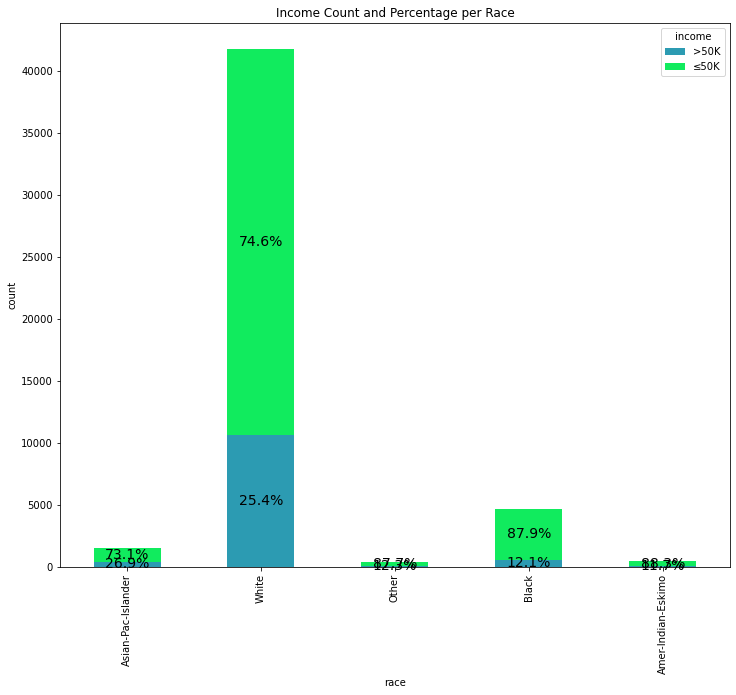

In [17]:
df_race_income.plot(x = 'race',
                    kind = 'bar',
                    stacked = True,
                    title = 'Income Count and Percentage per Race',
                    mark_right = True,
                    color=['#2c9bb2', '#11eb5e'],
                    figsize=(12, 10))

df_total = df_race_income["≤50K"] + df_race_income[">50K"]
df_rel = df_race_income[df_race_income.columns[1:]].div(df_total, 0) * 100



text = [plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        for n in df_rel \
        for i, (cs, ab, pc) in enumerate(zip(df_race_income.iloc[:, 1:].cumsum(1)[n],\
                                         df_race_income[n], df_rel[n]))]

#adjust_text(text)
        
plt.ylabel('count')

plt.show()




<font color='blue'> By race, Asian Pacific Islander and White have the highest proportion of individual with a >50K annual income. By race, their proportion of >50 annual income individuals is  approximately double that of other, blacks, and American Indian Eskimo individuals.</font>

In [18]:
df_occupation_income = df_adult.groupby(['occupation', 'income']).size().unstack().reset_index()
df_occupation_income

income,occupation,>50K,≤50K
0,?,265,2544
1,Adm-clerical,768,4843
2,Armed-Forces,5,10
3,Craft-repair,1383,4729
4,Exec-managerial,2908,3178
5,Farming-fishing,173,1317
6,Handlers-cleaners,138,1934
7,Machine-op-inspct,372,2650
8,Other-service,204,4719
9,Priv-house-serv,3,239


In [19]:
df_occupation_income.loc[:, 'total'] = df_occupation_income.loc[:, '≤50K'] + \
                                       df_occupation_income.loc[:, '>50K']
df_occupation_income.loc[:, '>50K_rate'] = df_occupation_income.loc[:, '>50K'] /\
                                           df_occupation_income.loc[:, 'total']
df_occupation_income = df_occupation_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_occupation_income = df_occupation_income.drop(columns=['total', '>50K_rate'])
df_occupation_income

income,occupation,>50K,≤50K
4,Exec-managerial,2908,3178
10,Prof-specialty,2784,3388
2,Armed-Forces,5,10
11,Protective-serv,308,675
13,Tech-support,420,1026
12,Sales,1475,4029
3,Craft-repair,1383,4729
14,Transport-moving,481,1874
1,Adm-clerical,768,4843
7,Machine-op-inspct,372,2650


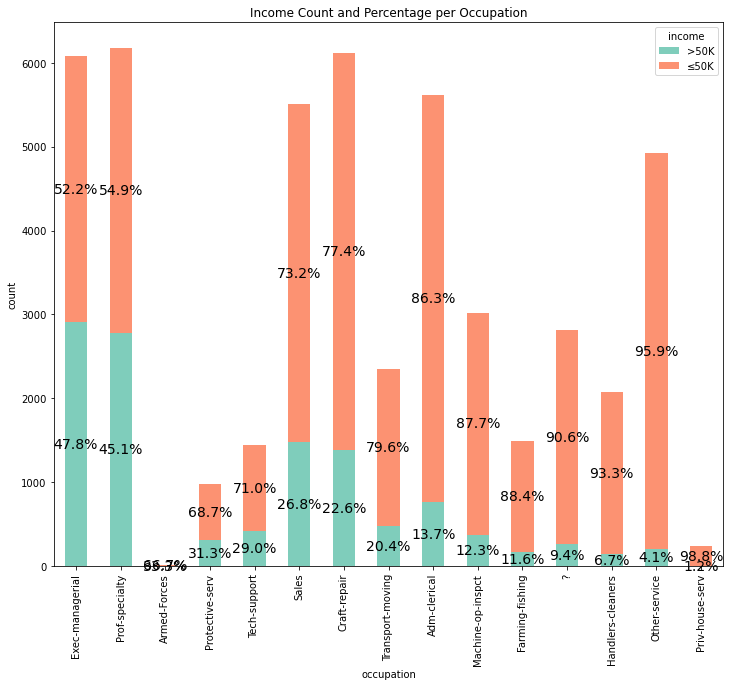

In [20]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

df_occupation_income.plot(x = 'occupation',
                      kind = 'bar',
                      stacked = True,
                      title = 'Income Count and Percentage per Occupation',
                      mark_right = True,
                      color=['#7fcdbb', '#fc9272'],
                      figsize=(12, 10))

df_total = df_occupation_income["≤50K"] + df_occupation_income[">50K"]
df_rel = df_occupation_income[df_occupation_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_occupation_income.iloc[:, 1:].cumsum(1)[n],
                                         df_occupation_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()



<font color='blue'> By occupation, the individuals of executive managerial and proffesion specialty reported the highest proportion of >50K annual income individuals. handler-cleaner, other service, and private house service occupation individuals reported with the lowest proportion of >50K annual income individuals. </font>

In [21]:
df_workclass_income = df_adult.groupby(['workclass', 'income']).size().unstack().reset_index().fillna(0)
df_workclass_income

income,workclass,>50K,≤50K
0,?,265.0,2534.0
1,Federal-gov,561.0,871.0
2,Local-gov,927.0,2209.0
3,Never-worked,0.0,10.0
4,Private,7387.0,26519.0
5,Self-emp-inc,938.0,757.0
6,Self-emp-not-inc,1077.0,2785.0
7,State-gov,530.0,1451.0
8,Without-pay,2.0,19.0


In [22]:
df_workclass_income.loc[:, 'total'] = df_workclass_income.loc[:, '≤50K'] + \
                                       df_workclass_income.loc[:, '>50K']
df_workclass_income.loc[:, '>50K_rate'] = df_workclass_income.loc[:, '>50K'] /\
                                           df_workclass_income.loc[:, 'total']
df_workclass_income = df_workclass_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_workclass_income = df_workclass_income.drop(columns=['total', '>50K_rate'])
df_workclass_income

income,workclass,>50K,≤50K
5,Self-emp-inc,938.0,757.0
1,Federal-gov,561.0,871.0
2,Local-gov,927.0,2209.0
6,Self-emp-not-inc,1077.0,2785.0
7,State-gov,530.0,1451.0
4,Private,7387.0,26519.0
8,Without-pay,2.0,19.0
0,?,265.0,2534.0
3,Never-worked,0.0,10.0


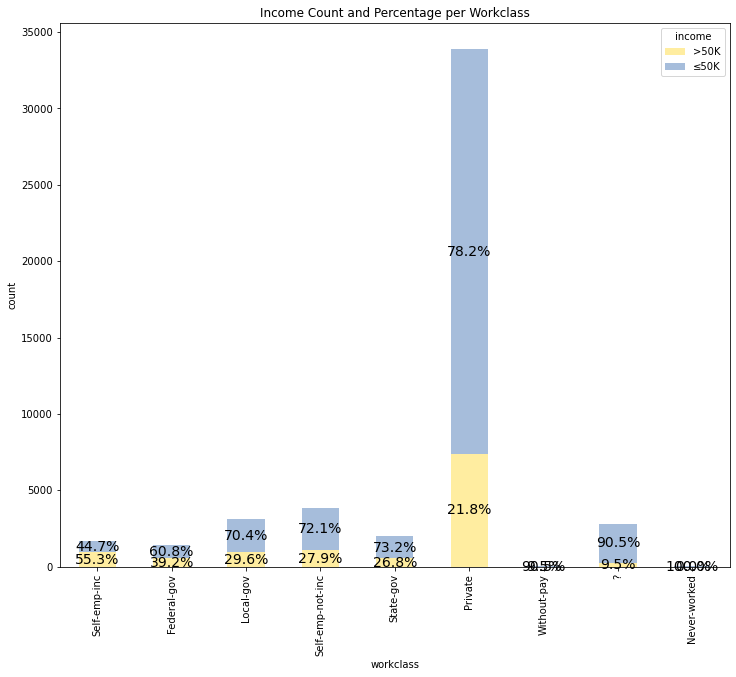

In [23]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

df_workclass_income.plot(x = 'workclass',
                      kind = 'bar',
                      stacked = True,
                      title = 'Income Count and Percentage per Workclass',
                      mark_right = True,
                      color=['#ffeda0', '#a6bddb'],
                      figsize=(12, 10))

df_total = df_workclass_income["≤50K"] + df_workclass_income[">50K"]
df_rel = df_workclass_income[df_workclass_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_workclass_income.iloc[:, 1:].cumsum(1)[n],
                                         df_workclass_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()




<font color='blue'> Of the work classes, the individuals of the private workclass group make up the highest count work class group. </font>

<font color='blue'> The work class group self employeed and incorporated has the highest proportion of individuals with >50K in annual income at 55%</font>

<font color='blue'> The work class group federal government follows with a proportion of 39% of individuals with >50K in annual income.</font>

<font color='blue'> The the work class groups with the lowest proportion of >50K in annual income individuals are the reported without pay, not specified, and never worked groups. </font>



In [24]:
df_marital_status_income = df_adult.groupby(['marital-status', 'income']).size().unstack().reset_index()
df_marital_status_income

income,marital-status,>50K,≤50K
0,Divorced,671,5962
1,Married-AF-spouse,14,23
2,Married-civ-spouse,9984,12395
3,Married-spouse-absent,58,570
4,Never-married,733,15384
5,Separated,99,1431
6,Widowed,128,1390


In [25]:
df_marital_status_income.loc[:, 'total'] = df_marital_status_income.loc[:, '≤50K'] + \
                                       df_marital_status_income.loc[:, '>50K']
df_marital_status_income.loc[:, '>50K_rate'] = df_marital_status_income.loc[:, '>50K'] /\
                                           df_marital_status_income.loc[:, 'total']
df_marital_status_income = df_marital_status_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_marital_status_income = df_marital_status_income.drop(columns=['total', '>50K_rate'])
df_marital_status_income

income,marital-status,>50K,≤50K
2,Married-civ-spouse,9984,12395
1,Married-AF-spouse,14,23
0,Divorced,671,5962
3,Married-spouse-absent,58,570
6,Widowed,128,1390
5,Separated,99,1431
4,Never-married,733,15384


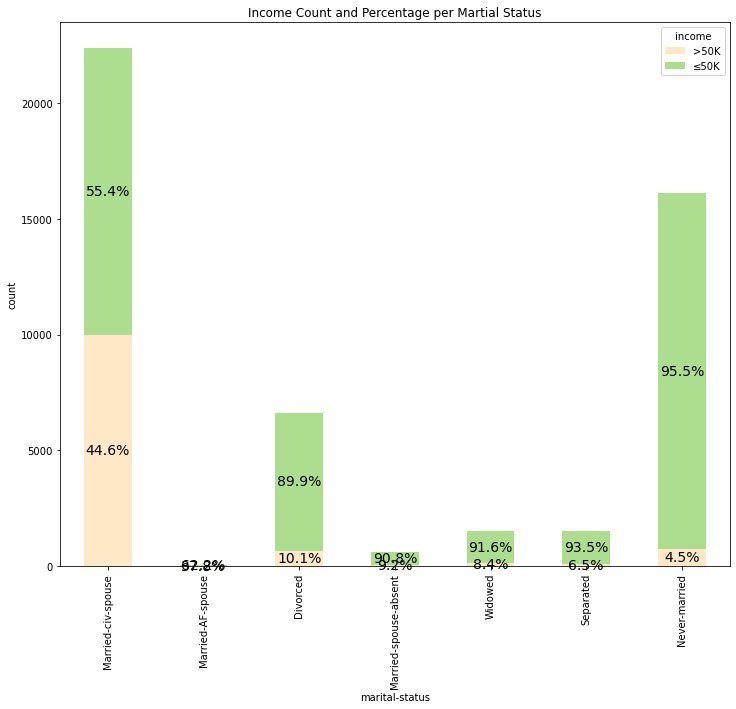

In [26]:
#plt.figure(figsize=(10, 10))

#sns.set(style="darkgrid")

df_marital_status_income.plot(x = 'marital-status',
                      kind = 'bar',
                      stacked = True,
                      title = 'Income Count and Percentage per Martial Status',
                      mark_right = True,
                      color=['#fee8c8', '#addd8e'],
                      figsize=(12, 10))

df_total = df_marital_status_income["≤50K"] + df_marital_status_income[">50K"]
df_rel = df_marital_status_income[df_marital_status_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_marital_status_income.iloc[:, 1:].cumsum(1)[n],
                                         df_marital_status_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()





<font color='blue'> The most popular marital status groups were of the married civilian spouse, never married, and divorced groups. </font>

<font color='blue'> Of these marital status groups, the married civial spouse group reported the highest proportion of individual with a >50K annual income at 45%. </font>

<font color='blue'> The maritial status group with the second highest proportion of individuals with a >50K annual income reported was the married air force spouse group at ??%. </font>

<font color='blue'> The maritial status group with the lowest proportion of individuals with a >50K annual income reported was the never-married group at 5%. </font>

In [27]:
df_relationship_income = df_adult.groupby(['relationship', 'income']).size().unstack().reset_index()
df_relationship_income

income,relationship,>50K,≤50K
0,Husband,8846,10870
1,Not-in-family,1276,11307
2,Other-relative,52,1454
3,Own-child,111,7470
4,Unmarried,309,4816
5,Wife,1093,1238


In [28]:
df_relationship_income.loc[:, 'total'] = df_relationship_income.loc[:, '≤50K'] + \
                                       df_relationship_income.loc[:, '>50K']
df_relationship_income.loc[:, '>50K_rate'] = df_relationship_income.loc[:, '>50K'] /\
                                           df_relationship_income.loc[:, 'total']
df_relationship_income = df_relationship_income.sort_values(['>50K_rate', 'total'], ascending=False)
df_relationship_income = df_relationship_income.drop(columns=['total', '>50K_rate'])
df_relationship_income

income,relationship,>50K,≤50K
5,Wife,1093,1238
0,Husband,8846,10870
1,Not-in-family,1276,11307
4,Unmarried,309,4816
2,Other-relative,52,1454
3,Own-child,111,7470


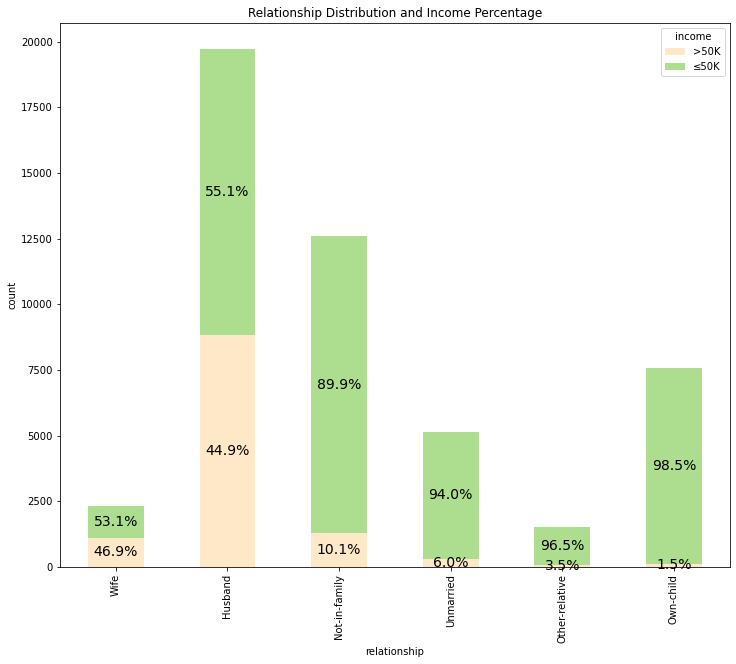

In [29]:


df_relationship_income.plot(x = 'relationship',
                      kind = 'bar',
                      stacked = True,
                      #title = 'Income Count and Percentage per Relationship',
                      title = 'Relationship Distribution and Income Percentage',
                      mark_right = True,
                      color=['#fee8c8', '#addd8e'],
                      figsize=(12, 10))

df_total = df_relationship_income["≤50K"] + df_relationship_income[">50K"]
df_rel = df_relationship_income[df_relationship_income.columns[1:]].div(df_total, 0) * 100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_relationship_income.iloc[:, 1:].cumsum(1)[n],
                                         df_relationship_income[n], df_rel[n])):
        plt.text(i, 
                 cs - ab / 2, 
                 str(np.round(pc, 1)) + '%', va = 'center', 
                 ha = 'center', 
                 rotation = 0, 
                 fontsize = 14)
        
plt.ylabel('count')

plt.show()






<font color='blue'> Individuals in the relationship (to others) group reported as wife had the highest proportion of individuals with an annual income >50K at 47%.</font>

<font color='blue'> The next relationshp group husband had the second highest proportino of individuals with an annual income >50K at 45%</font>

<font color='blue'> Relationship groups with the lowest proportion of individuals reporting a >50K annual income include unmarried, other-relative, and own-child at 6%, 3.5%, and 1.5% respectively. </font>


In [30]:
df_age_count = df_adult.value_counts('age').reset_index().rename(columns={0:'count'})
p(df_age_count)

(74, 2)


,age,count
0,36,1348
1,35,1337
2,33,1335
3,23,1329
4,31,1325
69,88,6
70,85,5
71,87,3
72,89,2
73,86,1


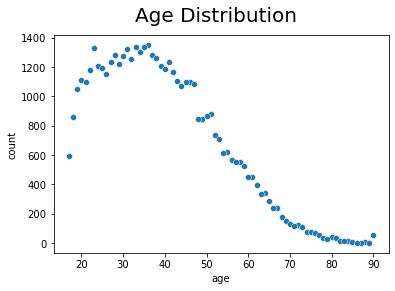

In [31]:
sns.scatterplot(x='age', y='count', data=df_age_count)
plt.suptitle('Age Distribution', 
             size = 20);

<font color='blue'> the most popular age to be working is from approximately 19 to 47 years old inclusive. </font>

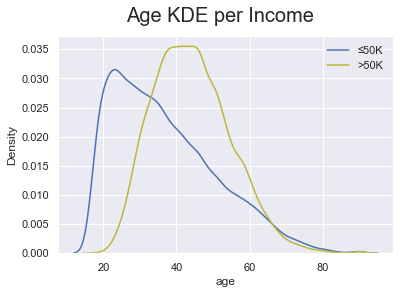

In [32]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '≤50K', :]['age'], shade=False, color="b", label='≤50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['age'], shade=False, color="#BEB539", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot

plt.suptitle('Age KDE per Income', 
             size = 20);

plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


<font color='blue'> Kernel density estimate plots for individuals by age with ≤50K in annual income (in blue) and >50K in annual income (in dark yellow) shows the >50K in annual income group has a high count around age 40 relative to other ages. </font>

In [33]:
'''age_counts = (df_adult.groupby(['income'])['age']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('age'))
p = sns.barplot(x="age", y="percentage", hue="income", data=age_counts)
plt.xticks([-7, 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],)'''

'age_counts = (df_adult.groupby([\'income\'])[\'age\']\n                     .value_counts(normalize=True)\n                     .rename(\'percentage\')\n                     .mul(100)\n                     .reset_index()\n                     .sort_values(\'age\'))\np = sns.barplot(x="age", y="percentage", hue="income", data=age_counts)\nplt.xticks([-7, 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],)'

In [34]:
bins = [17, 19, 29, 39, 49, 59, 69, 79, 89, 99]
df_adult['age_bins'] = pd.cut(df_adult['age'], 
                              bins=bins, 
                              labels=['17-19', '20-29', '30-39',
                                      '40-49', '50-59', '60-69',
                                      '70-79', '80-89', '90-99'])
df_adult.head(11)

#https://stackoverflow.com/questions/45273731/binning-a-column-with-python-pandas

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,≤50K,20-29
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,≤50K,30-39
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,20-29
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,40-49
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,≤50K,17-19
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,≤50K,30-39
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,≤50K,20-29
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,60-69
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,≤50K,20-29
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,≤50K,50-59


In [35]:
df_adult_age_bins_income = df_adult.groupby('age_bins')['income'].value_counts().unstack().reset_index()
df_adult_age_bins_income

income,age_bins,>50K,≤50K
0,17-19,3,1912
1,20-29,743,11262
2,30-39,3461,9468
3,40-49,3986,6738
4,50-59,2509,4110
5,60-69,809,2245
6,70-79,147,668
7,80-89,16,115
8,90-99,13,42


In [36]:
df_adult_age_bins_income.loc[:, '>_<=_50K_ratio'] = df_adult_age_bins_income.loc[:, '>50K'] / df_adult_age_bins_income.loc[:, '≤50K']
df_adult_age_bins_income

income,age_bins,>50K,≤50K,>_<=_50K_ratio
0,17-19,3,1912,0.001569
1,20-29,743,11262,0.065974
2,30-39,3461,9468,0.365547
3,40-49,3986,6738,0.591570
4,50-59,2509,4110,0.610462
5,60-69,809,2245,0.360356
6,70-79,147,668,0.220060
7,80-89,16,115,0.139130
8,90-99,13,42,0.309524


In [37]:
df_adult_age_bins_income.loc[:, 'total'] = df_adult_age_bins_income.loc[:, '>50K'] + \
                                           df_adult_age_bins_income.loc[:, '≤50K']

In [38]:
df_adult_age_bins_income.loc[:, '>50K_rate'] = df_adult_age_bins_income.loc[:, '>50K'] / \
                                               df_adult_age_bins_income.loc[:, 'total']

In [39]:
df_adult_age_bins_income

income,age_bins,>50K,≤50K,>_<=_50K_ratio,total,>50K_rate
0,17-19,3,1912,0.001569,1915,0.001567
1,20-29,743,11262,0.065974,12005,0.061891
2,30-39,3461,9468,0.365547,12929,0.267693
3,40-49,3986,6738,0.591570,10724,0.371690
4,50-59,2509,4110,0.610462,6619,0.379060
5,60-69,809,2245,0.360356,3054,0.264898
6,70-79,147,668,0.220060,815,0.180368
7,80-89,16,115,0.139130,131,0.122137
8,90-99,13,42,0.309524,55,0.236364


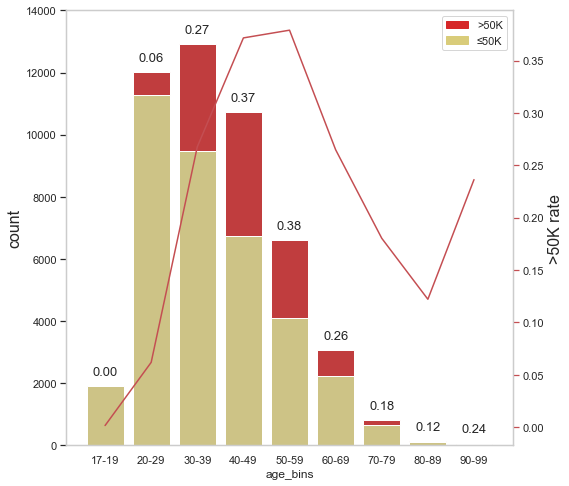

In [40]:
sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(8, 8))

bar1 = sns.barplot(x="age_bins",  y="total", data=df_adult_age_bins_income, color='tab:red')

bar2 = sns.barplot(x="age_bins", y="≤50K", data=df_adult_age_bins_income, estimator=sum, ci=None,  color='#D9CC7A')

bar2.set_ylabel('count', fontsize=16)

top_bar = mpatches.Patch(color='tab:red', label='>50K')
bottom_bar = mpatches.Patch(color='#D9CC7A', label='≤50K')
plt.legend(handles=[top_bar, bottom_bar])


for p, rate in zip(bar1.patches, df_adult_age_bins_income.loc[:, '>50K_rate']):
    bar1.annotate(format(rate, '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + 833), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

bar1.set_ylim([0, 14000])

ax2 = bar1.twinx()
color = 'r'

ax2.set_ylabel('>50K rate', fontsize=16)
ax2 = sns.lineplot(x='age_bins', y='>50K_rate', data = df_adult_age_bins_income, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

#https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

plt.show()

<font color='blue'> starting from the age group 17-19 up to the 40-49 age group, the proportion of those working with a >50K annual income is increasing. In the following 50-59 age group, the proportion increases slightly, but is basically leveling off and a decline is seen in the 60-69 age group. Declines in the proportion making a >50K income are seen til the 80-89 age group. 

By the 90-99 age group, although a small sample size, we see an increase in the proportion with a >50K annual income.
</font>

<font color='purple'> reductions in the the >50K rate per age group following 41-50 possibly suggestions that age and having had more time to acquire knowledge are not major factors for those with a >50K income. Also, it may suggestion those in the 41-50 age group with >50K in annual income are retiring from a prosperious career and are therefore not found in the 51-60 age group and/or those to follow. </font>

In [41]:
df_age_education_income = df_adult.groupby(['age_bins', 'education'])['income']\
                                                .value_counts()\
                                                .unstack()\
                                                .reset_index()
df_age_education_income.head(11)

income,age_bins,education,>50K,≤50K
0,17-19,10th,NaN,77.0
1,17-19,11th,NaN,324.0
2,17-19,12th,1.0,127.0
3,17-19,1st-4th,NaN,3.0
4,17-19,5th-6th,NaN,8.0
5,17-19,7th-8th,1.0,18.0
6,17-19,9th,NaN,24.0
7,17-19,Assoc-acdm,NaN,2.0
8,17-19,Assoc-voc,NaN,5.0
9,17-19,Bachelors,NaN,2.0


In [42]:
df_age_education_income.loc[:, '>50K'] = df_age_education_income.loc[:, '>50K'].fillna(0)
df_age_education_income.head(11)

income,age_bins,education,>50K,≤50K
0,17-19,10th,0.0,77.0
1,17-19,11th,0.0,324.0
2,17-19,12th,1.0,127.0
3,17-19,1st-4th,0.0,3.0
4,17-19,5th-6th,0.0,8.0
5,17-19,7th-8th,1.0,18.0
6,17-19,9th,0.0,24.0
7,17-19,Assoc-acdm,0.0,2.0
8,17-19,Assoc-voc,0.0,5.0
9,17-19,Bachelors,0.0,2.0


In [43]:
df_age_education_income.loc[:, 'total'] = df_age_education_income.loc[:, '≤50K'] + \
                                          df_age_education_income.loc[:, '>50K']
df_age_education_income.head(11)

income,age_bins,education,>50K,≤50K,total
0,17-19,10th,0.0,77.0,77.0
1,17-19,11th,0.0,324.0,324.0
2,17-19,12th,1.0,127.0,128.0
3,17-19,1st-4th,0.0,3.0,3.0
4,17-19,5th-6th,0.0,8.0,8.0
5,17-19,7th-8th,1.0,18.0,19.0
6,17-19,9th,0.0,24.0,24.0
7,17-19,Assoc-acdm,0.0,2.0,2.0
8,17-19,Assoc-voc,0.0,5.0,5.0
9,17-19,Bachelors,0.0,2.0,2.0


In [44]:
df_age_education_income.loc[:, '>50K_rate'] = df_age_education_income.loc[:, '>50K'] \
                                              / df_age_education_income.loc[:, 'total']
df_age_education_income.head(11)

income,age_bins,education,>50K,≤50K,total,>50K_rate
0,17-19,10th,0.0,77.0,77.0,0.000000
1,17-19,11th,0.0,324.0,324.0,0.000000
2,17-19,12th,1.0,127.0,128.0,0.007812
3,17-19,1st-4th,0.0,3.0,3.0,0.000000
4,17-19,5th-6th,0.0,8.0,8.0,0.000000
5,17-19,7th-8th,1.0,18.0,19.0,0.052632
6,17-19,9th,0.0,24.0,24.0,0.000000
7,17-19,Assoc-acdm,0.0,2.0,2.0,0.000000
8,17-19,Assoc-voc,0.0,5.0,5.0,0.000000
9,17-19,Bachelors,0.0,2.0,2.0,0.000000


In [45]:
df_age_education_income.loc[:, '≤50K_rate'] =  df_age_education_income.loc[:, '≤50K'] \
                                              / df_age_education_income.loc[:, 'total']
df_age_education_income.head(11)

income,age_bins,education,>50K,≤50K,total,>50K_rate,≤50K_rate
0,17-19,10th,0.0,77.0,77.0,0.000000,1.000000
1,17-19,11th,0.0,324.0,324.0,0.000000,1.000000
2,17-19,12th,1.0,127.0,128.0,0.007812,0.992188
3,17-19,1st-4th,0.0,3.0,3.0,0.000000,1.000000
4,17-19,5th-6th,0.0,8.0,8.0,0.000000,1.000000
5,17-19,7th-8th,1.0,18.0,19.0,0.052632,0.947368
6,17-19,9th,0.0,24.0,24.0,0.000000,1.000000
7,17-19,Assoc-acdm,0.0,2.0,2.0,0.000000,1.000000
8,17-19,Assoc-voc,0.0,5.0,5.0,0.000000,1.000000
9,17-19,Bachelors,0.0,2.0,2.0,0.000000,1.000000


In [46]:
df_education_educational_num = df_adult.loc[:, ['education', 'educational-num']].drop_duplicates().sort_values('educational-num')
df_education_educational_num

,education,educational-num
779,Preschool,1
323,1st-4th,2
37,5th-6th,3
9,7th-8th,4
54,9th,5
5,10th,6
0,11th,7
173,12th,8
1,HS-grad,9
3,Some-college,10


In [47]:
df_age_education_income = pd.merge(df_age_education_income, df_education_educational_num, on='education')
df_age_education_income.head(11)

,age_bins,education,>50K,≤50K,total,>50K_rate,≤50K_rate,educational-num
0,17-19,10th,0.0,77.0,77.0,0.000000,1.000000,6
1,20-29,10th,3.0,263.0,266.0,0.011278,0.988722,6
2,30-39,10th,15.0,253.0,268.0,0.055970,0.944030,6
3,40-49,10th,21.0,154.0,175.0,0.120000,0.880000,6
4,50-59,10th,35.0,196.0,231.0,0.151515,0.848485,6
5,60-69,10th,12.0,117.0,129.0,0.093023,0.906977,6
6,70-79,10th,0.0,38.0,38.0,0.000000,1.000000,6
7,80-89,10th,1.0,4.0,5.0,0.200000,0.800000,6
8,90-99,10th,0.0,2.0,2.0,0.000000,1.000000,6
9,17-19,11th,0.0,324.0,324.0,0.000000,1.000000,7


In [48]:
df_age_education_income = df_age_education_income.sort_values(['age_bins', 'educational-num'])

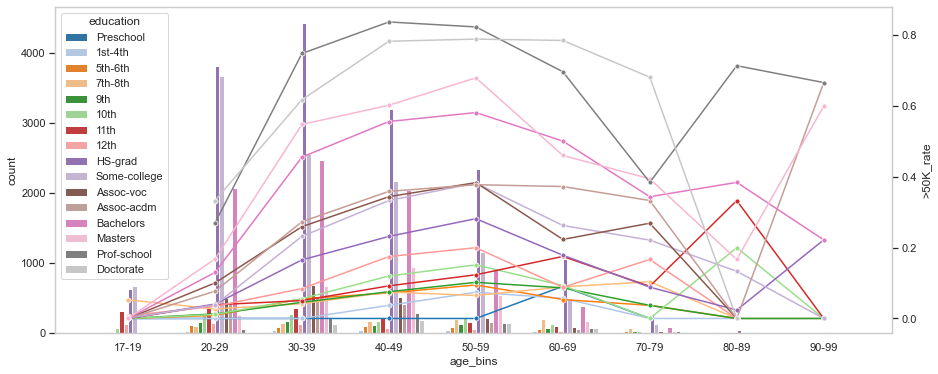

In [49]:
#sns.color_palette("rocket_r", as_cmap=True)

fig, ax = plt.subplots(figsize=(15,6))

ax2 = ax.twinx()

g = sns.barplot(x='age_bins',
                   y='total',
                   hue='education',
                   data=df_age_education_income,
                   ax=ax,
                   palette="tab20")

g = sns.lineplot(x='age_bins',  
                 y='>50K_rate', 
                 hue='education', 
                 data=df_age_education_income, 
                 ax=ax2,
                 marker='.', 
                 markersize=10,
                 legend=None,
                 palette='tab20')
#https://stackoverflow.com/questions/55618166/seaborn-multiaxis-graph-assigning-different-colors-to-the-same-shared-category-h

ax.set(ylabel='count')

plt.tick_params(axis='x', rotation=45)

plt.xticks(ha="right")

plt.tick_params(bottom=False)

plt.tick_params(left=False)

#https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots

<font color='blue'> The education groups highschool and some college are consistently the highest count groups across age bins.  </font>

<font color='blue'> Of education groups, the professional school and doctorate school groups had the highest >50K annual income rates across age bins. </font>



In [50]:
import matplotlib.patches as mpatches

df_education_income = df_adult.groupby(['education'])['income'].value_counts().unstack().reset_index()

df_education_income.loc[:, 'total'] = \
df_education_income.loc[:, '≤50K'].values + df_education_income.loc[:, '>50K']

df_education_income.loc[:, '>50K_rate'] = \
df_education_income.loc[:, '>50K'].values / df_education_income.loc[:, 'total']

df_education_income_total = df_education_income.sort_values(['>50K_rate', 'total'], ascending=False)

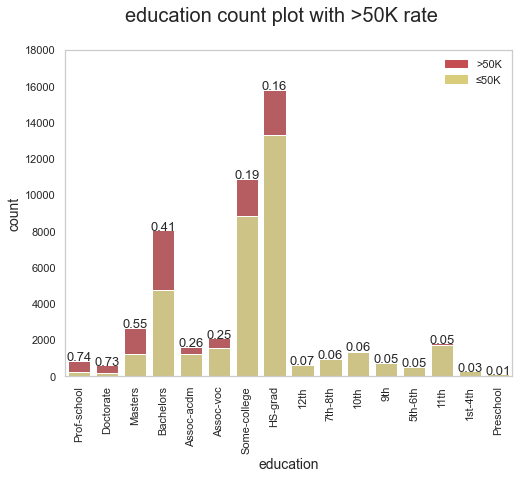

In [51]:
plt.figure(figsize=(8, 6))

splot = sns.barplot(x="education",  y="total", data=df_education_income_total, color='r')

bar2 = sns.barplot(x="education",
                   y="≤50K",
                   data = df_education_income_total,
                   color='#D9CC7A')

top_bar = mpatches.Patch(color='r', label='>50K')
bottom_bar = mpatches.Patch(color='#D9CC7A', label='≤50K')

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot


for p, rate in zip(splot.patches, df_education_income_total.loc[:, '>50K_rate']):
    splot.annotate(format(rate, '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() + 833), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
#https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

plt.xlabel("education", size=14)

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count', size=14)

splot.set_ylim(0,18000)

plt.suptitle('education count plot with >50K rate', 
             size = 20);



<font color='blue'> From 12th grade education to a high school education, the data suggests there is an approximate doubling in the proportion with a >50K annual income at .07 and .16 respectively. </font>


<font color='blue'> Achieving some college, a vocational associates, or an academic associates each shows a higher proportion of individuals a with annual income >50K.</font>

<font color='blue'> There is a near triplinging in the proportion of individuals with a bachelors as their highest level of education accomplished compared to individuals with high school as their highest level of education accomplish at .41 and .16 respectively. </font>


<font color='blue'> The highest proportion of individuals with a >50K annual income by highest level of education achieved goes to individuals with a professional school completed.</font>



In [52]:
df_education_income_total.head(11)

income,education,>50K,≤50K,total,>50K_rate
14,Prof-school,617,217,834,0.739808
10,Doctorate,431,163,594,0.725589
12,Masters,1459,1198,2657,0.549116
9,Bachelors,3313,4712,8025,0.412835
7,Assoc-acdm,413,1188,1601,0.257964
8,Assoc-voc,522,1539,2061,0.253275
15,Some-college,2063,8815,10878,0.189649
11,HS-grad,2503,13281,15784,0.158578
2,12th,48,609,657,0.073059
5,7th-8th,62,893,955,0.064921


In [53]:
df_education_income_total = df_education_income_total.reset_index(drop=True)
df_education_income_total

income,education,>50K,≤50K,total,>50K_rate
0,Prof-school,617,217,834,0.739808
1,Doctorate,431,163,594,0.725589
2,Masters,1459,1198,2657,0.549116
3,Bachelors,3313,4712,8025,0.412835
4,Assoc-acdm,413,1188,1601,0.257964
5,Assoc-voc,522,1539,2061,0.253275
6,Some-college,2063,8815,10878,0.189649
7,HS-grad,2503,13281,15784,0.158578
8,12th,48,609,657,0.073059
9,7th-8th,62,893,955,0.064921


In [54]:
df_education_income_total.columns.name = None


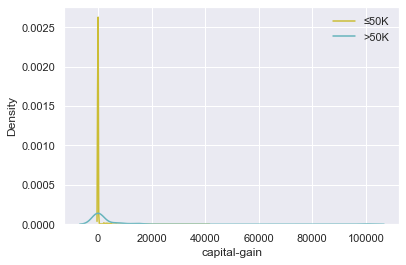

In [55]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '≤50K', :]['capital-gain'], shade=False, color="#CBBD35", label='≤50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['capital-gain'], shade=False, color="#66B4BC", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


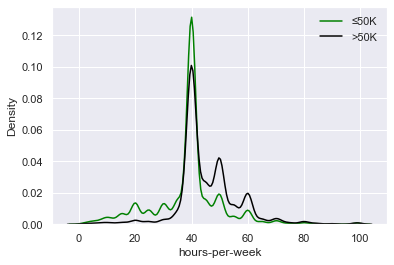

In [56]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '≤50K', :]['hours-per-week'], shade=False, color="green", label='≤50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['hours-per-week'], shade=False, color="black", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


<font color='blue'> among individuals with a >50K annual income, 40, 50, and 60 hours are common hours-per-week worked.</font>

<font color='blue'> among individuals with a ≤50K annual income, 40, 50, and 60 hours are common hours-per-week worked in addition to 35, 30, and 20.</font>

In [57]:
df_hours_per_week_income = df_adult.groupby(['hours-per-week','income']).size().unstack().reset_index()
df_hours_per_week_income = df_hours_per_week_income.fillna(0)
df_hours_per_week_income.loc[:, 'total'] = df_hours_per_week_income.loc[:, '>50K'] + \
                                           df_hours_per_week_income.loc[:, '≤50K']
df_hours_per_week_income.loc[:, '>50K_rate'] = df_hours_per_week_income.loc[:, '>50K'] / \
                                               df_hours_per_week_income.loc[:, 'total']
df_hours_per_week_income = df_hours_per_week_income.sort_values(['total', '>50K_rate'], ascending=False)
df_hours_per_week_income20 = df_hours_per_week_income.head(20)
df_hours_per_week_income20 = df_hours_per_week_income20.sort_values('hours-per-week')
df_hours_per_week_income = df_hours_per_week_income.sort_values('hours-per-week')
df_hours_per_week_income

income,hours-per-week,>50K,≤50K,total,>50K_rate
0,1,3.0,24.0,27.0,0.111111
1,2,12.0,41.0,53.0,0.226415
2,3,3.0,56.0,59.0,0.050847
3,4,6.0,78.0,84.0,0.071429
4,5,9.0,86.0,95.0,0.094737
5,6,10.0,82.0,92.0,0.108696
6,7,7.0,38.0,45.0,0.155556
7,8,19.0,199.0,218.0,0.087156
8,9,3.0,24.0,27.0,0.111111
9,10,33.0,392.0,425.0,0.077647


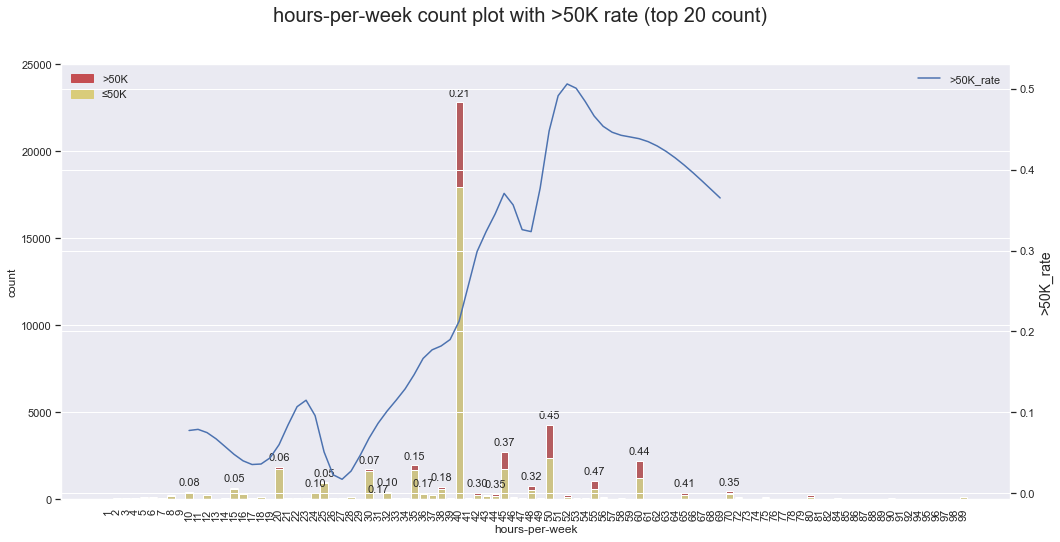

In [58]:
from scipy.interpolate import interp1d


fig, ax = plt.subplots(figsize=(17,8))


ax2 = ax.twinx()

splot = sns.barplot(x="hours-per-week", 
                    y="total", 
                    data=df_hours_per_week_income, 
                    color='r',
                    ax=ax)

bar2 = sns.barplot(x="hours-per-week",
                   y="≤50K",
                   data = df_hours_per_week_income,
                   color='#D9CC7A',
                   ax=ax)

ax.set(ylabel='count')


top_bar = mpatches.Patch(color='r', label='>50K')
bottom_bar = mpatches.Patch(color='#D9CC7A', label='≤50K')


for p, rate in zip(splot.patches, df_hours_per_week_income.loc[:, '>50K_rate']):
    
    #if df_hours_per_week_income20.loc[:, '>50K_rate'].isin([rate]):
    #print(round(rate, 5))
    if round(rate, 6) in round(df_hours_per_week_income20.loc[:, '>50K_rate'], 6).values:
        #print(rate)
        splot.annotate(format(rate, '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height() + 1233), 
                       ha = 'center', va = 'center', 
                       size=11,
                       xytext = (0, -12), 
                       textcoords = 'offset points')

plt.xlabel("hours-per-week", size=14)

ax.legend(handles=[top_bar, bottom_bar], frameon=False, loc=2)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count', size=14)

splot.set_ylim(0, 25000)

plt.suptitle('hours-per-week count plot with >50K rate (top 20 count)', 
             size = 20);

df1 = df_hours_per_week_income20.loc[:, ['hours-per-week' ,'>50K_rate']]
df1.set_index('hours-per-week', inplace=True)


f1 = interp1d(df1.index, df1['>50K_rate'], kind='cubic')


df2 = pd.DataFrame()
new_index = np.arange(df1.index.min(), df1.index.max())
df2['>50K_rate'] = f1(new_index)
df2.index = new_index - 1 

ax2 = df2.plot.line(ax=ax2)
ax2.set_xlabel("hours-per-week")
ax2.set_ylabel(">50K_rate")

ax2.set_xlabel("hours-per-week")
ax2.set_ylabel(">50K_rate")

ax2.legend(frameon=False, loc=1)

ax.tick_params(axis='x', rotation=90)

sns.set_style(style='white')
plt.show()







<font color='blue'> There is a clear majority for indidividuals in the 40 hours (worked) per week group </font>

<font color='blue'> With increasing hours per week there is a trend of increasing >50 annual income rates. Of our top 20 hours per week by count, the highest >50K annual income rates were for the indivuals of the 55, 50, and 60 hours-per-week groups at .47, .45, and .44 respectively. </font>

<AxesSubplot:xlabel='hours-per-week'>

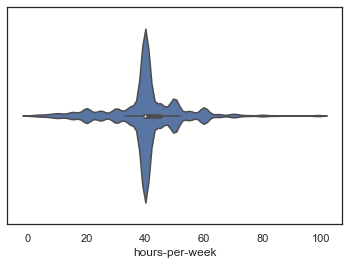

In [59]:
sns.violinplot(x="hours-per-week", data=df_adult)


<font color='blue'> Working 40 is the mode for hour-per-week and there is a left skew towards working more than 40 hours opposed to less than 40 hours. </font>

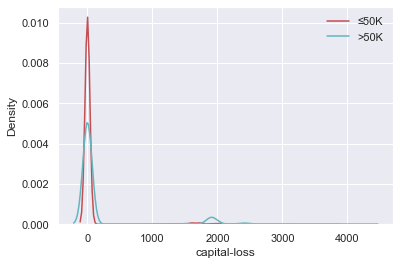

In [60]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '≤50K', :]['capital-loss'], 
                  shade=False, 
                  color="r", 
                  label='≤50K',
                  bw_method=.12)
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['capital-loss'], 
                  shade=False, 
                  color="#66B4BC", 
                  label='>50K',
                  bw_method=.12)

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


<font color='blue'> The ≤50K annual income group shows a higher concentration of their group with a 0 capital-loss reported compare to their >50K annual income counterpart. An approximate $2000 capital loss among the >50 annual income group appears to be a commonly reported capital loss in this 1994 census. </font>

In [61]:
df_adult.drop(columns='fnlwgt', inplace=True)

In [62]:
df = df_adult

df_corr = df.corr()


In [63]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))



/var/folders/77/y4hv4_s9751293nzv4yrfrtm0000gn/T/ipykernel_37859/2406951172.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


/var/folders/77/y4hv4_s9751293nzv4yrfrtm0000gn/T/ipykernel_37859/174555850.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


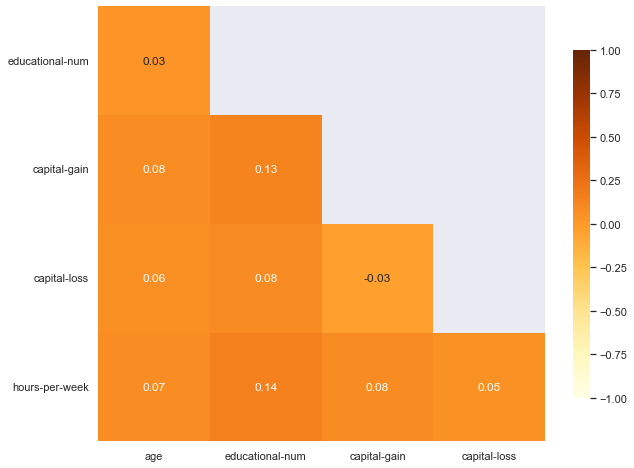

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))


mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='YlOrBr',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0)
plt.show()

<font color='blue'> The highest correlations are shown as between hours per week and educational number at .14 and capital gain and educational number at .13. This can be explained as individuals a high educational number (i.e. more advanced education completed) tend to work more hours per week. Also, individuals with higher educational numbers tend to have a higher capital gain.</font>




## 3.6 Summary<a id='3.6_Summary'></a>

<font color='blue'>Categories age, vocation, education, hours per week, marital status, and relationship show clear actionable trends for higher >50K annual income proportions. </font>